# Audio Noise Separation

Proposed Algorithm :
1. Load Audio
2. Convert it from time domain data to frequency domain data using FFT(Fast Fourier Transformation)
3. Perform Calculations(Separate noise from audio)
4. Apply Inverse Fourier Transformation on extracted audios
5. Export Audios


Resources : 
- [Understanding Audio data](https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520)

In [84]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
import numpy as np
import soundfile as sf

## Step 1 : Load Audio

In [112]:
# loading audio
def load_audio(filepath):
    samples, sampling_rate = librosa.load(filepath, sr = None, mono = True, offset = 0.0, duration = None)
    return samples, sampling_rate
    
file_path = "./data/sample1/source.m4a"
samples, sampling_rate = load_audio(file_path)
len(samples), sampling_rate

/home/debashish/miniconda3/envs/mini-project/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


(147456, 44100)

In [3]:
# duration
duration_of_sound = len(samples) / sampling_rate
print("Duration of audio :", duration_of_sound, "seconds")

Duration of audio : 3.3436734693877552 seconds


In [4]:
Audio(file_path)

### Time domain representation

In [106]:
 def plot_waveshow_td_representation(audio, sampling_rate):
    plt.figure(figsize=(15,7))
    librosa.display.waveshow(y = audio, sr = sampling_rate)
    plt.xlabel("Time (in seconds)")
    plt.ylabel("Amplitude")
    return plt.show()

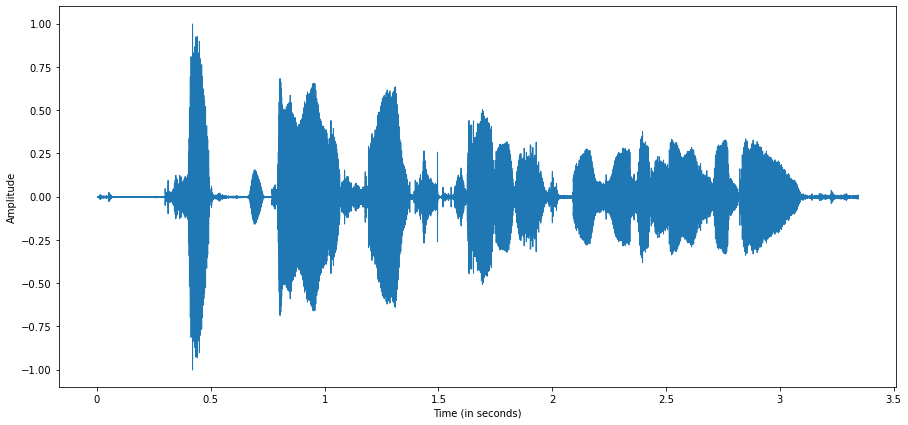

In [107]:
plot_waveshow_td_representation(samples, sampling_rate)

## Step 2 : Apply Fourier Transform

### Frequency domain representation

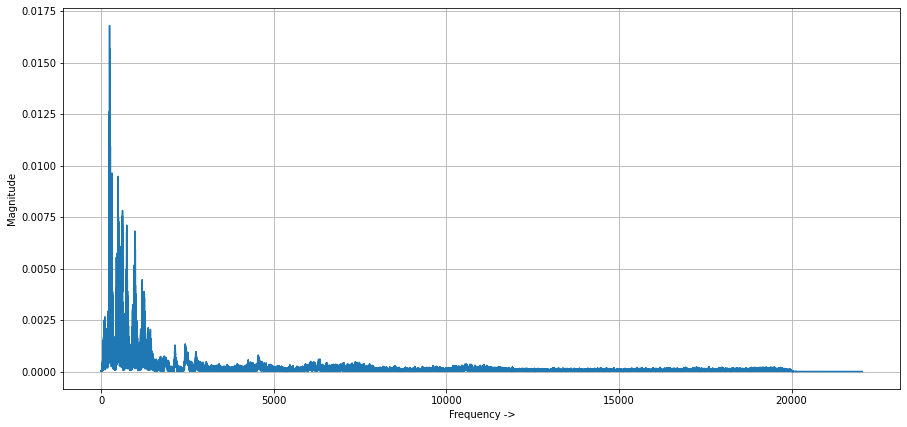

In [105]:
def fft_plot(audio, sampling_rate):
    plt.rcParams["figure.figsize"] = [15, 7]
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency ->")
    plt.ylabel("Magnitude")
    return plt.show(), yf, xf

_, yf, xf = fft_plot(samples, sampling_rate)

## Step 3 : Perform Calculations

## Step 4 : Perform Inverse Fourier Transform

### inverse fourier transform

In [80]:
iyf = scipy.fftpack.ifft(yf).real

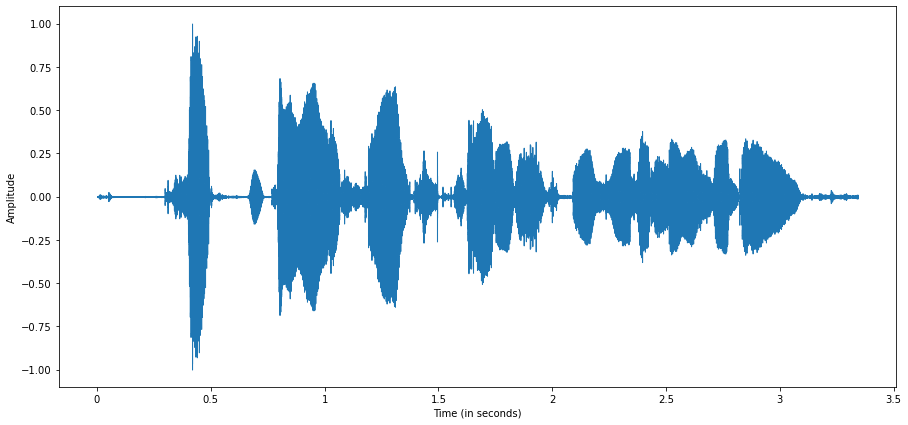

In [111]:
plot_waveshow_td_representation(iyf, sampling_rate)

## Step 5 : Extract Audio

In [89]:
def extract_audio(filename, audio, sampling_rate):
    sf.write(filename, audio, samplerate=sampling_rate)

In [110]:
extract_audio('output.wav', iyf, sampling_rate)